# B&W Flower Image Colorization
<h3>Elad Shabi, Nadav Dori, Chen Shmilovich</h3>
<hr>

In the following code we built a convolutional neural network using keras library,<br>
that gets as an input 32X32 pixels grayscale images of flowers, and generates an output of 96X96 colored flowers images.

<hr>
* <b>Data-Sets</b><br>
We used a data set that contains 8189 pairs of grayscale and colored flower images<br>
The training set is consisted of 70% of the images, while the test set is consisted of 30% of them. 10% of the training images are used for validation.<br>

<hr>

* <b>Model's Network Architecture</b><br>
We've been experimenting with several different designs of the network.<br>
In every model we chose to use RELU activation function on the hidden layers of the network.<br>
On the output layer we used sigmoid function in order to output values between 0 and 1.<br>
Generally the network processed the input image in such a way that it has been shrinked on the first few layers and than upscaled to the desired output dimensions. We used strides and up-sampling in order to do so.<br>
We achieved the best results for this assignment using the described method.<br>
Overfitting on these kind of networks is a subjective matter, therefore we needed to examine the results and determine wether they match our expectations.
<hr>
* <b>Model's Training</b><br>
We normalized the input pixel values to be between 0 and 1, and used the mean square error loss function to measure our results.<br>
After that we also tried using the "msle" loss function which we found more suitable for our project.
On both occasions we used the "rmsprop" optimizer to minimize our loss.
<hr>
* <b>Performance</b><br>
We were suprised by our initial results, it seemed like the network recognized the shapes and textures of the input images, and also colored them nicely.<br>
The only issue we had is the lack of sharpness of the output images.<br>
We then added more convolutional layers to deepen our network and we increased the amount of filters in each layer dramatically. Furthermore we tested different batch sizes and number of epochs.<br>
The output images became more sharp and clear, the results were way over our expectations.
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, UpSampling2D, Dropout, Dense, Flatten, Activation, InputLayer
import glob as glob
import matplotlib

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [3]:
bw_folder_path = "/Users/i/Desktop/Deep Learning/Project/B&W Colorization/JPEG32/"
colored_folder_path = "/Users/i/Desktop/Deep Learning/Project/B&W Colorization/JPEG96/"

In [4]:
bw_images_names=glob.glob(bw_folder_path +"*.jpg")
bw_images_names.sort()

bw_images = []
for name in bw_images_names:
    bw_image = Image.open(name)
    bw_image = np.array(bw_image,dtype=np.float32)
    bw_image = rgb2gray(bw_image)
    bw_image = bw_image/255
    bw_images.append(bw_image)
    
bw_images = np.array(bw_images)

In [5]:
colored_images_names=glob.glob(colored_folder_path +"*.jpg")
colored_images_names.sort()

colored_images = []
for name in colored_images_names:
    colored_image = Image.open(name)
    colored_image = np.array(colored_image,dtype=np.float32)
    colored_image = colored_image/255
    colored_images.append(colored_image)

colored_images = np.array(colored_images)

In [6]:
bw_images = bw_images.reshape(bw_images.shape[0],32,32,1)

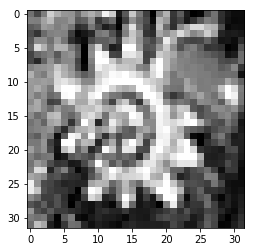

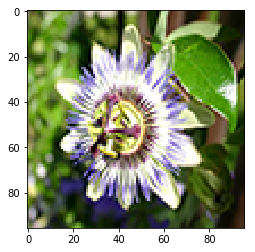

In [7]:
plt.imshow(bw_images[0].reshape(32,32),cmap='gist_gray')
plt.show()

plt.imshow(colored_images[0])
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(bw_images, colored_images, test_size=0.30, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=101)

<hr>
# A Model

In [3]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32,1)))
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(3, (9, 9), activation='sigmoid', padding='same'))

# Finish model
model.compile(optimizer='rmsprop',loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 16)          0         
__________

<hr>
# B Model

In [9]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32,1)))
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(3, (9, 9), activation='sigmoid', padding='same'))

model.compile(optimizer='rmsprop',loss='msle')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

<hr>
# C Model

In [10]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((4,4)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((3, 3)))
model.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.summary()
model.compile(optimizer='rmsprop',loss='msle',metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 256)       295168    
__________

<hr>
# Training the model

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=170, epochs=900,validation_data=(X_val, y_val), verbose=1)

# Testing the model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [13]:
model = load_model("./models/d_model.h5py")

X:


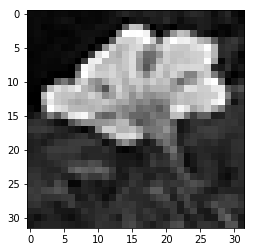

y:


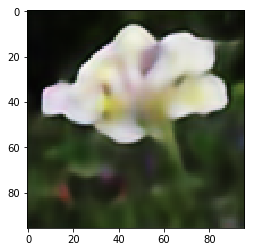

y_true:


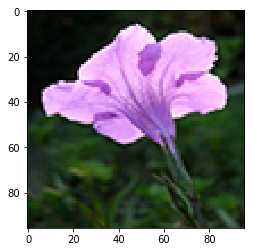

difference:


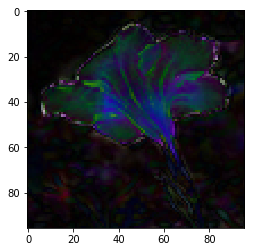

In [14]:
test_array = []
test_index = 20
test_image = X_test[test_index]
plt.imshow(test_image.reshape(32,32), cmap='gist_gray')
print("X:")
plt.show()
test_array.append(test_image)
test_array = np.array(test_array)
output = model.predict(test_array)

plt.imshow(output[0])
print("y:")
plt.show()

plt.imshow(y_test[test_index])
print("y_true:")
plt.show()

print("difference:")
diff = abs(output[0] - y_test[test_index])
plt.imshow(diff)
plt.show()

# Results

<table style="float:left">
    <tr>
        <th style="text-align:center">Input</th>
        <th style="text-align:center">Model A</th>
        <th style="text-align:center">Model B</th>
        <th style="text-align:center">Model C</th>
    </tr>
    <tr>
        <td><img src="b_model_examples/12_x_test.png"></img></td>
        <td><img src="b_model_examples/12_prediction.png"></img></td>
        <td><img src="c_model_examples/12_prediction.png"></img></td>
        <td><img src="d_model_examples/12_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/19_x_test.png"></img></td>
        <td><img src="b_model_examples/19_prediction.png"></img></td>
        <td><img src="c_model_examples/19_prediction.png"></img></td>
        <td><img src="d_model_examples/19_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/20_x_test.png"></img></td>
        <td><img src="b_model_examples/20_prediction.png"></img></td>
        <td><img src="c_model_examples/20_prediction.png"></img></td>
        <td><img src="d_model_examples/20_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/24_x_test.png"></img></td>
        <td><img src="b_model_examples/24_prediction.png"></img></td>
        <td><img src="c_model_examples/24_prediction.png"></img></td>
        <td><img src="d_model_examples/24_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/29_x_test.png"></img></td>
        <td><img src="b_model_examples/29_prediction.png"></img></td>
        <td><img src="c_model_examples/29_prediction.png"></img></td>
        <td><img src="d_model_examples/29_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/94_x_test.png"></img></td>
        <td><img src="b_model_examples/94_prediction.png"></img></td>
        <td><img src="c_model_examples/94_prediction.png"></img></td>
        <td><img src="d_model_examples/94_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/101_x_test.png"></img></td>
        <td><img src="b_model_examples/101_prediction.png"></img></td>
        <td><img src="c_model_examples/101_prediction.png"></img></td>
        <td><img src="d_model_examples/101_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/103_x_test.png"></img></td>
        <td><img src="b_model_examples/103_prediction.png"></img></td>
        <td><img src="c_model_examples/103_prediction.png"></img></td>
        <td><img src="d_model_examples/103_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/160_x_test.png"></img></td>
        <td><img src="b_model_examples/160_prediction.png"></img></td>
        <td><img src="c_model_examples/160_prediction.png"></img></td>
        <td><img src="d_model_examples/160_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/202_x_test.png"></img></td>
        <td><img src="b_model_examples/202_prediction.png"></img></td>
        <td><img src="c_model_examples/202_prediction.png"></img></td>
        <td><img src="d_model_examples/202_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/322_x_test.png"></img></td>
        <td><img src="b_model_examples/322_prediction.png"></img></td>
        <td><img src="c_model_examples/322_prediction.png"></img></td>
        <td><img src="d_model_examples/322_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/341_x_test.png"></img></td>
        <td><img src="b_model_examples/341_prediction.png"></img></td>
        <td><img src="c_model_examples/341_prediction.png"></img></td>
        <td><img src="d_model_examples/341_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/342_x_test.png"></img></td>
        <td><img src="b_model_examples/342_prediction.png"></img></td>
        <td><img src="c_model_examples/342_prediction.png"></img></td>
        <td><img src="d_model_examples/342_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/399_x_test.png"></img></td>
        <td><img src="b_model_examples/399_prediction.png"></img></td>
        <td><img src="c_model_examples/399_prediction.png"></img></td>
        <td><img src="d_model_examples/399_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/400_x_test.png"></img></td>
        <td><img src="b_model_examples/400_prediction.png"></img></td>
        <td><img src="c_model_examples/400_prediction.png"></img></td>
        <td><img src="d_model_examples/400_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/790_x_test.png"></img></td>
        <td><img src="b_model_examples/790_prediction.png"></img></td>
        <td><img src="c_model_examples/790_prediction.png"></img></td>
        <td><img src="d_model_examples/790_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/850_x_test.png"></img></td>
        <td><img src="b_model_examples/850_prediction.png"></img></td>
        <td><img src="c_model_examples/850_prediction.png"></img></td>
        <td><img src="d_model_examples/850_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/900_x_test.png"></img></td>
        <td><img src="b_model_examples/900_prediction.png"></img></td>
        <td><img src="c_model_examples/900_prediction.png"></img></td>
        <td><img src="d_model_examples/900_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/920_x_test.png"></img></td>
        <td><img src="b_model_examples/920_prediction.png"></img></td>
        <td><img src="c_model_examples/920_prediction.png"></img></td>
        <td><img src="d_model_examples/920_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/2065_x_test.png"></img></td>
        <td><img src="b_model_examples/2065_prediction.png"></img></td>
        <td><img src="c_model_examples/2065_prediction.png"></img></td>
        <td><img src="d_model_examples/2065_prediction.png"></img></td>
    </tr>
    <tr>
        <td><img src="b_model_examples/2058_x_test.png"></img></td>
        <td><img src="b_model_examples/2058_prediction.png"></img></td>
        <td><img src="c_model_examples/2058_prediction.png"></img></td>
        <td><img src="d_model_examples/2058_prediction.png"></img></td>
    </tr>
</table>

# Fun experiments

<table style="float:left">
    <tr>
        <th style="text-align:center">Input</th>
        <th style="text-align:center">Model C</th>
    </tr>
    <tr>
        <td><img src="d_model_experiments/face_test_1.png"></img></td>
        <td><img src="d_model_experiments/face_test_1_pred.png"></img></td>
    </tr>
        <tr>
        <td><img src="d_model_experiments/face_test_2.png"></img></td>
        <td><img src="d_model_experiments/face_test_2_pred.png"></img></td>
    </tr>
    </tr>
        <tr>
        <td><img src="d_model_experiments/face_test_3.png"></img></td>
        <td><img src="d_model_experiments/face_test_3_pred.png"></img></td>
    </tr>
</table>